In [ ]:
#Predict the onset of diabetes based on diagnostic measures.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset = pd.read_csv("diabetes.csv")
# By this we load our dataset

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Checking for missing values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Dataset shape
dataset.shape

(768, 9)

In [ ]:
#Dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Dataset description
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


ANALYSING THE DATA

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    500
1    268
Name: Outcome, dtype: int64

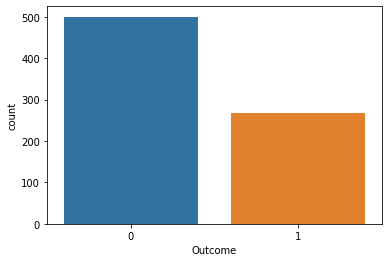

In [ ]:
#Count of outcome
sns.countplot('Outcome',data=dataset)
dataset['Outcome'].value_counts()

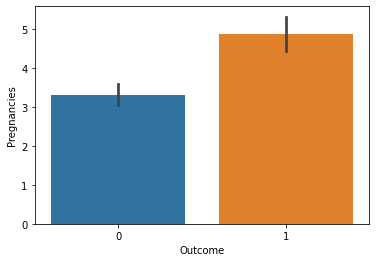

In [ ]:
#barplot  of no of people have diabeties with pregnacies or not
sns.barplot(x='Outcome',y='Pregnancies',data=dataset)

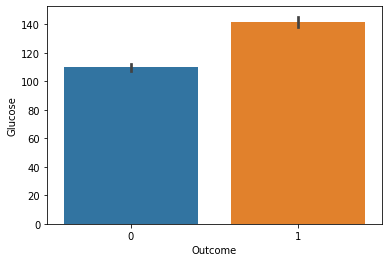

In [ ]:
#checking the no of glucose level in non diabetic and diabetic 
sns.barplot(x='Outcome',y='Glucose',data=dataset)

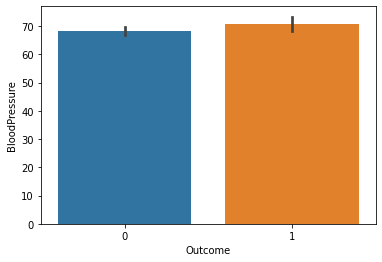

In [ ]:
sns.barplot(x='Outcome',y='BloodPressure',data=dataset)
#Checking the blood pressure of diabetic and non diabetic

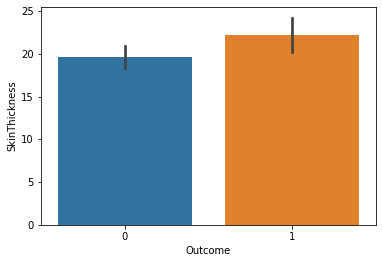

In [ ]:
sns.barplot(x='Outcome',y='SkinThickness',data=dataset)
# Checking the skinthickness of the outcome

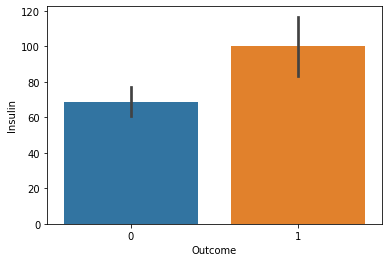

In [ ]:
sns.barplot(x='Outcome',y='Insulin',data=dataset)
#Checking the insuline level of diabetic and non diabetic

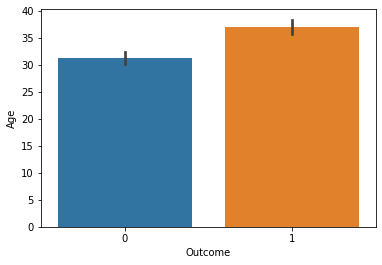

In [ ]:
sns.barplot(x='Outcome',y='Age',data=dataset)
#Checing the age of the outcome

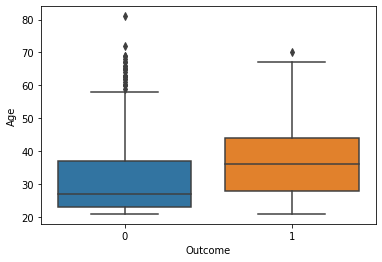

In [ ]:
sns.boxplot(x='Outcome',y='Age',data=dataset)

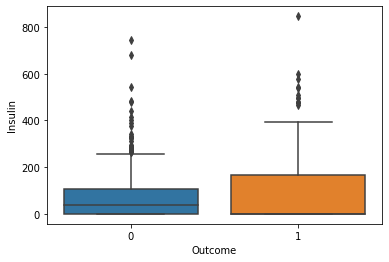

In [ ]:
sns.boxplot(x='Outcome',y='Insulin',data=dataset)

In [ ]:
dataset.corr()
#Checking the correlatin with all feature coloumn

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
#Dropping unnecessary columns
dataset.drop('SkinThickness', axis=1, inplace=True)

In [ ]:
scaler=StandardScaler()

In [ ]:
#Setting the value for dependent and independent variables
X = dataset.drop('Outcome', 1)
y=dataset["Outcome"]

<ipython-input-21-1c83f1971bbd>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = dataset.drop('Outcome', 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
# logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Prediction of test set
y_pred = lr_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
#Actual value and the predicted value
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a.head()

,Actual value,Predicted value
158,0,0
251,0,0
631,0,0
757,1,0
689,1,1


#Evaluation of the Model

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       109
           1       0.63      0.49      0.55        45

    accuracy                           0.77       154
   macro avg       0.72      0.68      0.70       154
weighted avg       0.75      0.77      0.76       154



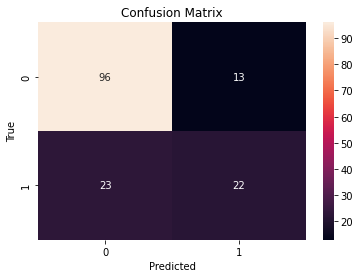

In [ ]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# import library for checking with Randomforestclassifier

In [ ]:
classifierA=RandomForestClassifier(n_estimators= 50, criterion="entropy")
#Fitting the model

In [ ]:
classifierA.fit(X_train, y_train)
#Prediction of test set
y_RF=classifierA.predict(X_test)


In [ ]:
# randomforest classification
from sklearn.metrics import accuracy_score
rt_accuracy=accuracy_score (y_RF,y_test)
rt_accuracy
#checking the accuracy

0.7597402597402597

Evaluation of the Model

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.59      0.60      0.59        45

    accuracy                           0.76       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.76      0.76      0.76       154



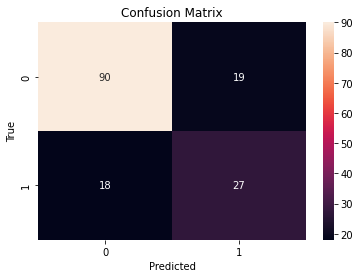

In [ ]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_RF)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_RF))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=2)
#checking with decision tree classifier 

In [ ]:
classifier.fit(X_train,y_train)
#fitting the model

DecisionTreeClassifier(criterion='entropy', random_state=2)

In [ ]:
y_DT= classifier.predict(X_test)

In [ ]:
# decision tree classifier
from sklearn.metrics import accuracy_score
dt_accuracy=accuracy_score(y_DT,y_test)

In [ ]:
dt_accuracy
#checking the accuracy

0.6623376623376623

Evaluation of the Model

Text(33.0, 0.5, 'True')

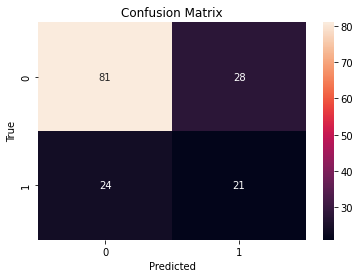

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_DT)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel ('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.svm import SVC
classifierB=SVC(kernel='linear',random_state=0)
classifierB.fit(X_train,y_train)
#checking for best outcome with SVM

SVC(kernel='linear', random_state=0)

In [ ]:
# svm 
model=classifierB.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
svm_accuracy=accuracy_score(model,y_test)

In [ ]:
svm_accuracy
#checking the accuracy

0.7662337662337663

Evalution of Model

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       109
           1       0.63      0.49      0.55        45

    accuracy                           0.77       154
   macro avg       0.72      0.68      0.70       154
weighted avg       0.75      0.77      0.76       154



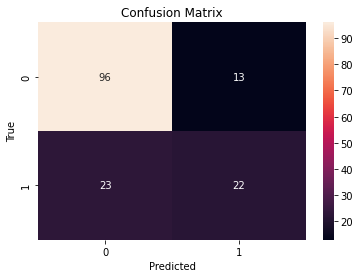

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_svm)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel ('Predicted')
plt.ylabel('True')
print(classification_report(y_test,y_svm))

In [ ]:
import pickle

# Save the model to a file
import pickle

# save the model to disk
filename = 'model'
pickle.dump(model, open(filename, 'wb'))
